In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def first_polygon_mask(event,x,y,flags,params):    #gets the main overall segment
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_image,(x,y),4,(255,0,0),-1)
        first_mask.append([x,y])                  #get points for first mask
        cv2.imshow("image",temp_image)            # leave "image" name the same for all temp images..
                                                  #this is to because you want to use the same image.
        
def second_polygon_mask(event,x,y,flags,params):    #used to remove inner segments that aren't needed
    if event == cv2.EVENT_LBUTTONDOWN:            # use the left click to get the points of a set
        cv2.circle(temp_image,(x,y),4,(0,255,0),-1)
        second_mask.append([x,y])
        cv2.imshow("image",temp_image)
    if event == cv2.EVENT_RBUTTONDOWN:            # use the right click to complete a set of points
        hold = second_mask.copy()    # second_mask and main_second_black are somehow connected by referencing..so I do this
        main_second_mask.append(hold)
        print(second_mask)
        second_mask.clear()
        print("One mask set done {}".format(main_black))

In [ ]:
#switching second mask and first mask
#hence second mask is done first

In [92]:
cam_name = "camera5"
path = "factory_imgs/" + cam_name +".png"
im = cv2.imread(path)
imm = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
temp_image = im.copy()          #temporary copy of main image used to highlight points for masks


second_mask = []
main_second_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",second_polygon_mask)
cv2.waitKey(0)
cv2.destroyAllWindows
print(main_second_mask)

[[577, 500], [584, 483], [599, 482], [614, 484], [632, 484], [648, 494], [663, 506], [663, 531], [662, 554], [659, 577], [643, 597], [609, 593], [582, 587], [578, 559], [576, 527]]
One mask set done []
[[716, 493], [716, 470], [724, 458], [741, 456], [755, 457], [777, 457], [792, 459], [803, 463], [821, 467], [828, 487], [826, 511], [825, 547], [816, 560], [782, 562], [755, 562], [739, 555], [718, 533]]
One mask set done []
[[622, 423], [637, 423], [667, 425], [679, 409], [683, 387], [682, 352], [655, 332], [627, 335], [597, 335], [589, 354], [586, 366], [581, 400], [602, 417]]
One mask set done []
[[741, 349], [768, 351], [792, 353], [811, 349], [827, 344], [838, 329], [838, 310], [837, 279], [821, 253], [804, 253], [790, 254], [766, 254], [746, 257], [721, 270], [715, 301], [717, 329]]
One mask set done []
[[621, 263], [642, 262], [657, 260], [672, 247], [686, 221], [684, 194], [681, 170], [654, 162], [635, 161], [611, 161], [595, 175], [589, 199], [581, 224], [588, 250]]
One mask se

[[246, 66], [833, 65], [835, 652], [245, 657]]


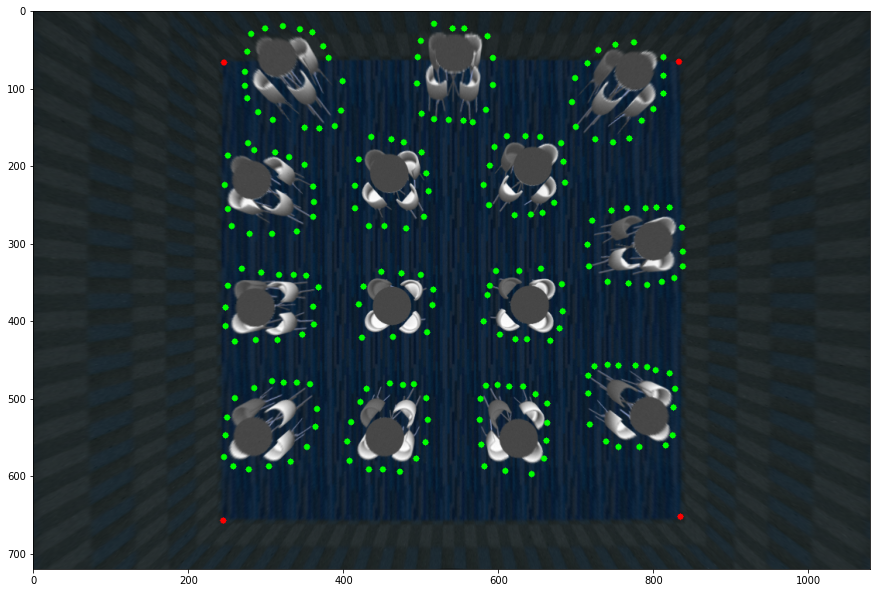

In [93]:
first_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",first_polygon_mask)   #call mouse event
cv2.waitKey(0)
cv2.destroyAllWindows()
print(first_mask)
plt.figure(figsize=(15,15))
plt.imshow(temp_image)

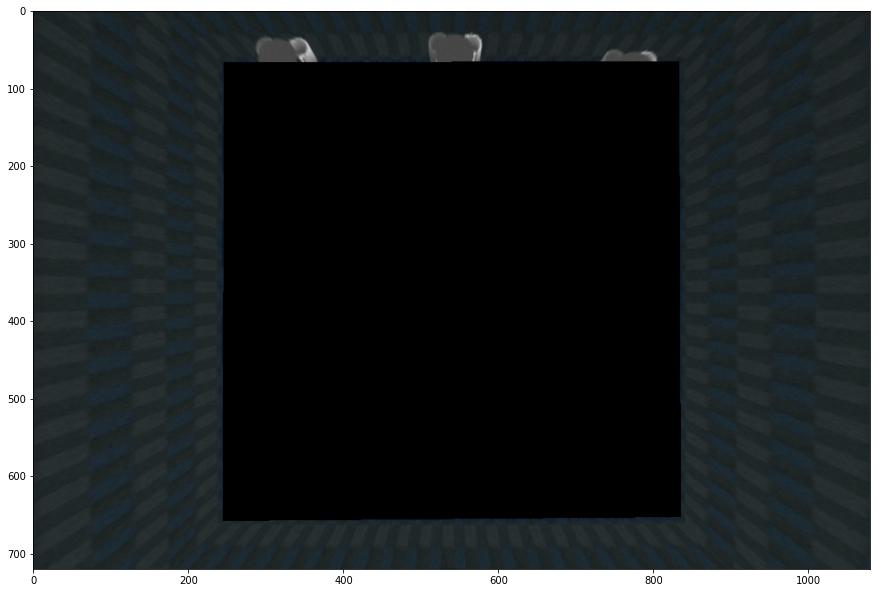

In [94]:
mask_w = np.zeros(temp_image.shape,dtype=np.uint8) #create blank image
poly = np.int64(np.array(first_mask))    #create polygon
cv2.fillConvexPoly(mask_w,poly,(255,255,255))  # fill polygon in image

mask_w = cv2.bitwise_not(mask_w)   # invert colors with this line
other_im = im.copy()  #temporary copy 2
mask_two = cv2.bitwise_and(other_im,mask_w)  #combine the images
plt.figure(figsize=(15,15))
plt.imshow(mask_two)
    

(14,)


/home/kiki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


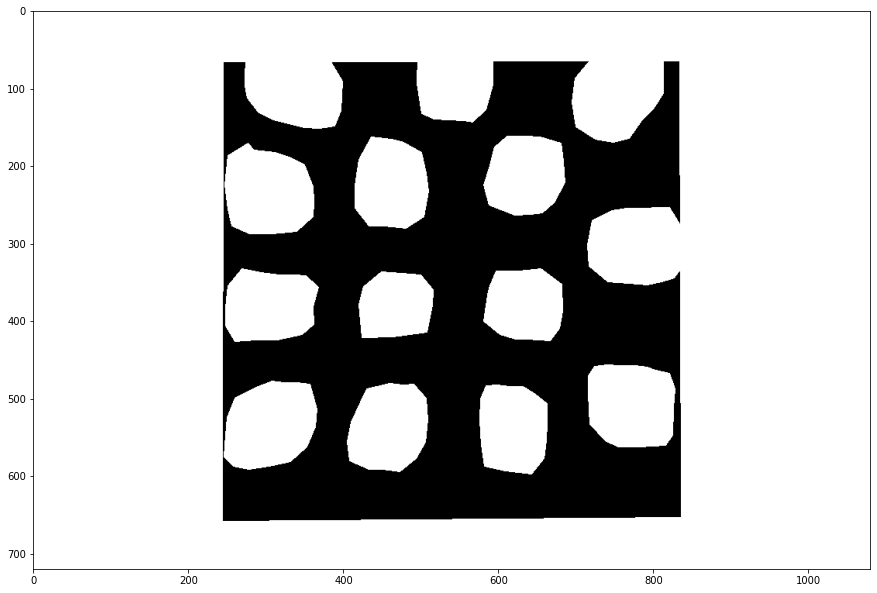

In [95]:
main_second_mask = np.array(main_second_mask)
mask_b = np.zeros(temp_image.shape,dtype=np.uint8)
print(main_second_mask.shape)

for pts in main_second_mask:     #go through all the set of points to create individual masks
    poly = np.int32(np.array(pts))
    cv2.fillConvexPoly(mask_b,poly,(255,255,255))
    other_im = im.copy()
    mask_one = cv2.bitwise_and(other_im,mask_b)
    
final_image = cv2.bitwise_or(mask_two,mask_one)
final_mask = cv2.bitwise_or(mask_w,mask_b)
final_image = cv2.cvtColor(final_image,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,15))
plt.imshow(final_mask)

In [96]:
destination_path = "segmented_imgs/"+cam_name+".png"
cv2.imwrite(destination_path,final_mask)   #save image mask

True